In [1]:
%load_ext autoreload
%autoreload 2

# Individual FF plots

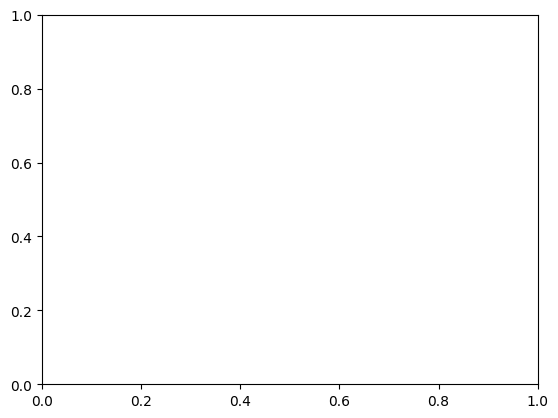

In [3]:
from src import paths

import os
import numpy as np
import matplotlib.pyplot as plt

plt.figure(1)

exp_list = os.listdir(paths.processed_data_path)

for experiment in exp_list:
    if not experiment.startswith('.'):
        data = np.genfromtxt(paths.processed_data_path / experiment / 'frozen_fraction_report.csv',
                     delimiter=',',
                     skip_header=1,
                     dtype=[('date', 'datetime64[s]'),
                            ('Setpoit_Temp_°C', '<f8'),
                            ('Bath_Temp_°C', '<f8'),
                            ('FF', '<f8')])        
        plt.plot(data['Bath_Temp_°C'], data['FF'])
        plt.savefig(paths.reports_path / 'individual-FF' / f'{experiment}.png')
        plt.cla()
        
        
        suma = data['Bath_Temp_°C'].sum()
        last = data['Bath_Temp_°C'][-1]

# Non-heated vs heated

221007_LVS10_0811_0600_720min_T95_001
221006_LVS_0808_bg2_T95_001
221013_LVS51_0903_1900_660min_T95_001
221010_LVS27_0822_1800_720min_T95_001
221006_LVS02_0807_0600_493min_T95_001
221013_LVS49_0902_1800_720min_T95_001
221010_LVS24_0821_0600_720min_T95_001
221011_LVS31_0824_1800_720min_T95_001
221010_LVS_0819_bg4_T95_001
221011_LVS32_0825_0600_720min_T95_001
221011_LVS28_0823_0600_720min_T95_001
221007_LVS13_0812_1800_720min_T95_001
221010_LVS18_0818_0600_720min_T95_001
221010_LVS19_0818_1800_720min_T95_001
221007_LVS14_0813_0600_720min_T95_001
221012_LVS40_0829_0600_720min_T95_001
221007_LVS11_0811_1800_720min_T95_001
221006_LVS03_0807_1821_401min_T95_001
221013_LVS45_0831_1800_720min_T95_001
Can't find experiment 221013_LVS45_0831_1800_720min_T95_001
221011_LVS29_0823_1800_720min_T95_001
221006_LVS04_0808_0621_624min_T95_001
221013_LVS46_0901_0640_660min_T95_001
221006_LVS05_0808_1800_720min_T95_001
221006_LVS01_0806_1800_588min_T95_001
221007_LVS08_0810_0600_720min_T95_001
221010_LVS

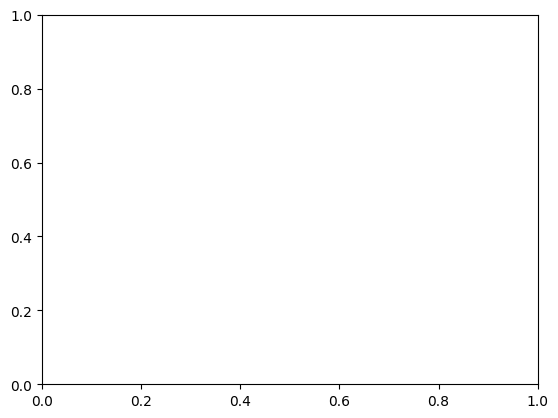

In [4]:
from src import paths

import os
import numpy as np
import matplotlib.pyplot as plt

plt.figure(1)

exp_list = os.listdir(paths.processed_data_path)


for experiment in exp_list:
    if not experiment.startswith('.') and experiment.split('_')[-2] == 'T95':
        data = np.genfromtxt(paths.processed_data_path / experiment / 'frozen_fraction_report.csv',
                     delimiter=',',
                     skip_header=1,
                     dtype=[('date', 'datetime64[s]'),
                            ('Setpoit_Temp_°C', '<f8'),
                            ('Bath_Temp_°C', '<f8'),
                            ('FF', '<f8')])
        
        plt.plot(data['Bath_Temp_°C'], data['FF'], 'r', label='heated')
        
        a, b, c = experiment.split('_')[1:4]
        print(experiment)

        try:
            experiment = [s for s in exp_list if f"{a}_{b}_{c}" in s and "T20" in s][0]
        except IndexError:
            print(f"Can't find experiment {experiment}")
        
        data = np.genfromtxt(paths.processed_data_path / experiment / 'frozen_fraction_report.csv',
                     delimiter=',',
                     skip_header=1,
                     dtype=[('date', 'datetime64[s]'),
                            ('Setpoit_Temp_°C', '<f8'),
                            ('Bath_Temp_°C', '<f8'),
                            ('FF', '<f8')])
        
        plt.plot(data['Bath_Temp_°C'], data['FF'], 'b', label='non-heated')
        plt.legend()
        plt.grid()
        plt.savefig(paths.reports_path / 'heated-FF' / f'{experiment}.png')
        plt.cla()
        suma = data['Bath_Temp_°C'].sum()
        last = data['Bath_Temp_°C'][-1]

# Agorithms comparison

In [5]:
def read_matlab_results(experiment):
    temp = np.genfromtxt(paths.raw_data_path / experiment / 'T_auto.csv',
             delimiter=',',
             dtype=[('temp', '<f8')])
    n_wells = np.genfromtxt(paths.raw_data_path / experiment / 'nFrz.csv',
              delimiter=',',
              dtype=[('n_wells', '<f8')])

    return temp['temp'], n_wells['n_wells']

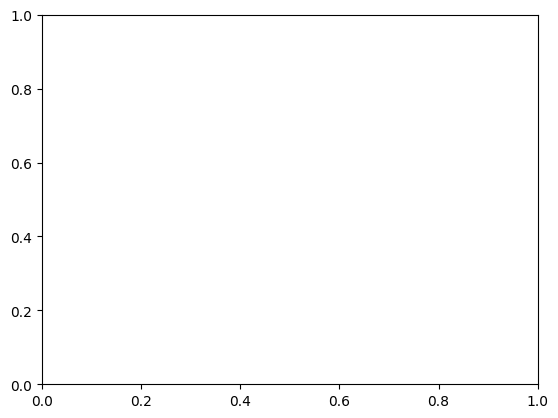

In [6]:
from src import paths

import os
import numpy as np
import matplotlib.pyplot as plt

plt.figure(1)

exp_list = os.listdir(paths.processed_data_path)


for experiment in exp_list:
    if not experiment.startswith('.'):
        data = np.genfromtxt(paths.processed_data_path / experiment / 'frozen_fraction_report.csv',
                     delimiter=',',
                     skip_header=1,
                     dtype=[('date', 'datetime64[s]'),
                            ('Setpoit_Temp_°C', '<f8'),
                            ('Bath_Temp_°C', '<f8'),
                            ('FF', '<f8')])
        
        plt.plot(data['Bath_Temp_°C'], data['FF'], label='Python')
        
        
        temp, n_wells = read_matlab_results(experiment)
        plt.plot(temp, n_wells/96., 'g', label='Matlab')
        
        plt.grid()
        plt.legend()
        plt.savefig(paths.reports_path / 'algorithms-comparison-FF' / f'{experiment}.png')
        plt.cla()

# Comparison heated vs non-heated

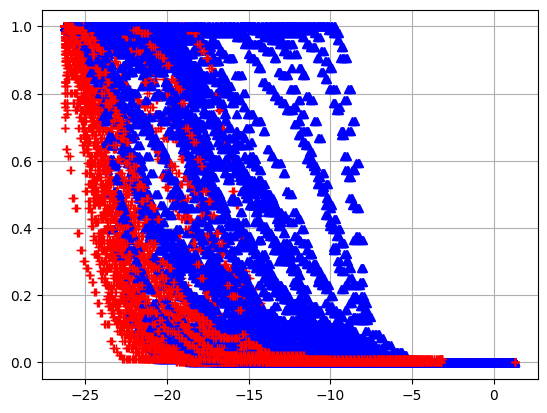

In [7]:
from src import paths

import os
import numpy as np
import matplotlib.pyplot as plt

plt.figure(1)

exp_list = os.listdir(paths.processed_data_path)


for experiment in exp_list:
    if not experiment.startswith('.'):
        data = np.genfromtxt(paths.processed_data_path / experiment / 'frozen_fraction_report.csv',
                         delimiter=',',
                         skip_header=1,
                         dtype=[('date', 'datetime64[s]'),
                                ('Setpoit_Temp_°C', '<f8'),
                                ('Bath_Temp_°C', '<f8'),
                                ('FF', '<f8')])
        
        if experiment.split('_')[-2] == 'T95':
            plt.plot(data['Bath_Temp_°C'], data['FF'], '+r', label='heated')
        
        elif experiment.split('_')[-2] == 'T20':
            plt.plot(data['Bath_Temp_°C'], data['FF'], '^b', label='non-heated')

        else:
            plt.plot(data['Bath_Temp_°C'], data['FF'], '^k', label='background')
        

# plt.legend()
plt.grid()

plt.savefig(paths.reports_path / f'Comparison_heat_vs_nonheat.png')